In [121]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from sys import platform
import numpy as np
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import os



jtplot.style(theme='onedork')
jtplot.style(context='poster', fscale=2, spines=False, gridlines='--')
sns.set_color_codes("muted")

In [149]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/Krista/'

fig_path = os.path.join(home, 'Dropbox/loki_0_0.5/loki_0.5_figures/learning_signals')

In [150]:
obs_ls_df = pd.read_csv(home + 'Dropbox/loki_0.5/analysis/aggregated_data/ls_reward_df.csv')

In [151]:
obs_ls_df.head()

,cpp,b_t0,b_t1,MC,H,signed_B_diff,ideal_B,lambda_val,p_optimal,trial,...,p_id_solution,id_choice,stim_duration,stim_onset,stim_offset,abs_response_time,epoch_length,epoch_trial,epoch_number,shifted_epoch_trial
0,0.076938,1.038488,3.199304,0.383517,0.0975,0.000000,-2.160816,10.0,0.65,1,...,102.0,102.0,1.499901,10.694065,12.193966,11.168357,14.0,1.0,0.0,1.0
1,0.319389,1.073995,2.636439,0.604624,0.0975,2.160816,-1.562444,10.0,0.65,2,...,102.0,102.0,1.499189,17.007908,18.507097,17.508012,14.0,2.0,0.0,2.0
2,0.300755,1.210057,1.084931,0.467104,0.0975,1.562444,0.125126,10.0,0.65,3,...,102.0,102.0,1.499536,23.021708,24.521244,23.555879,14.0,3.0,0.0,3.0
3,0.365146,1.297258,2.998052,0.489297,0.0975,-0.125126,-1.700794,10.0,0.65,4,...,102.0,109.0,1.499888,29.218555,30.718443,29.863544,14.0,4.0,0.0,4.0
4,0.074485,1.371289,0.931292,0.456994,0.0975,1.700794,0.439997,10.0,0.65,5,...,102.0,102.0,1.499449,35.266001,36.765450,35.733463,14.0,5.0,0.0,5.0


In [152]:
obs_ls_df['lambda_val'] = obs_ls_df.lambda_val.astype('int').astype('category')
obs_ls_df["p_optimal"] = obs_ls_df.p_optimal.astype('category')

In [153]:
filtered_obs_ls_df = obs_ls_df.loc[(obs_ls_df.shifted_epoch_trial <= 7) & (obs_ls_df.shifted_epoch_trial > -2)]

In [154]:
filtered_obs_ls_df['lambda_val'] = filtered_obs_ls_df.lambda_val.astype('int').astype('category')
filtered_obs_ls_df["p_optimal"] = filtered_obs_ls_df.p_optimal.astype('category')

/home/krista/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


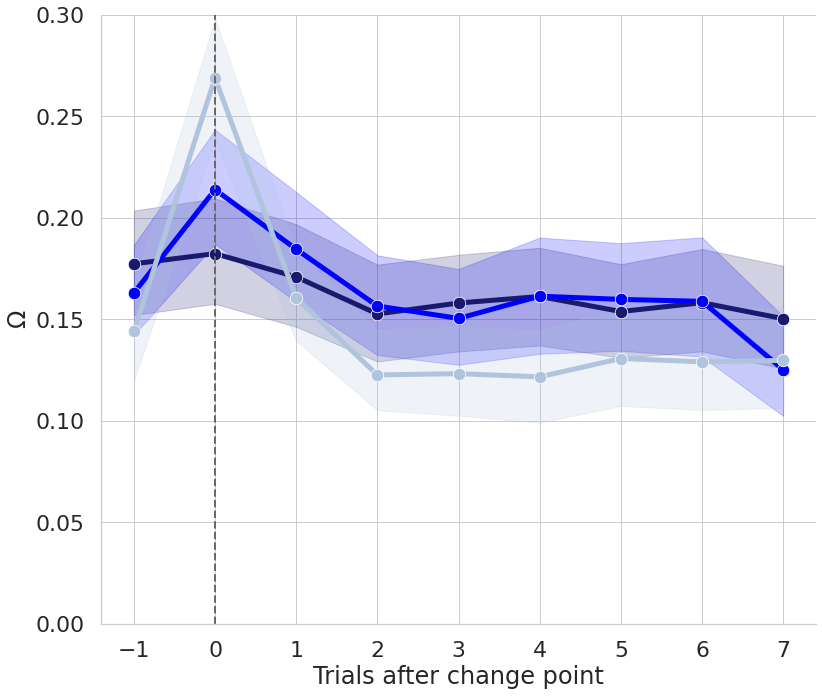

In [155]:
sns.set(font_scale=2, style='whitegrid')  
colors = ['midnightblue', 'blue', 'lightsteelblue']

sns.lineplot("shifted_epoch_trial", "cpp", color=light_blue, 
             data=filtered_obs_ls_df, linewidth=5, alpha=1,marker='.',
             markersize=25, hue="p_optimal", palette=sns.color_palette(colors),
            legend=False) 

plt.ylabel(r'$\Omega$')  
plt.ylim(0, 0.3)
plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')
plt.xlabel('Trials after change point')

sns.despine()


plt.savefig(os.path.join(fig_path, 'loki0.5_prob_cpp_ts.png'), dpi=600, 
                        bbox_inches='tight', transparent=0)

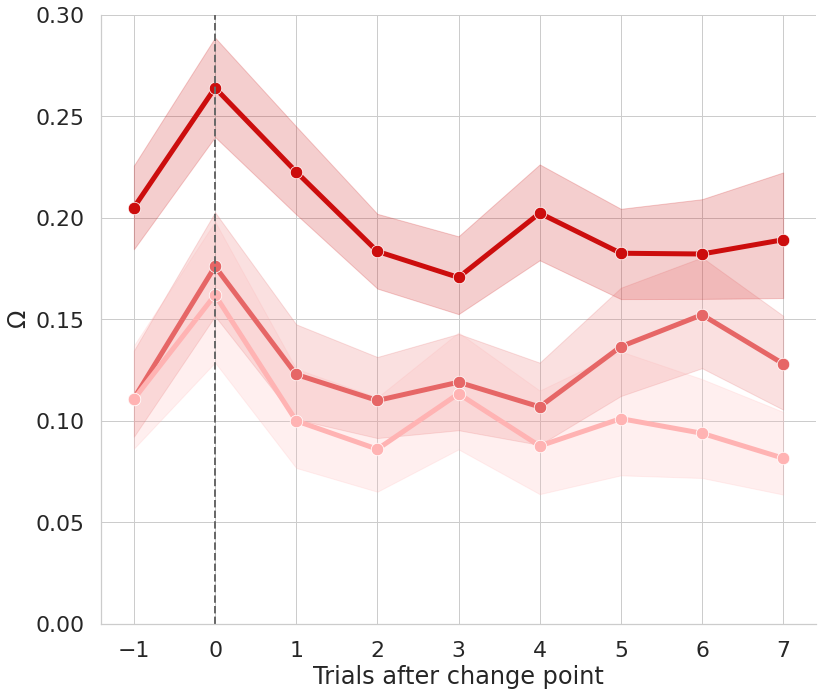

In [156]:
sns.set(font_scale=2, style='whitegrid')  



light_red = (1, 0.7, 0.7)
mod_red = (0.9, 0.4, 0.4)
dark_red = (0.8, 0.05, 0.05)

colors = [dark_red, mod_red, light_red]

sns.lineplot("shifted_epoch_trial", "cpp", color=light_blue, 
             data=filtered_obs_ls_df, linewidth=5, alpha=1,marker='.', 
             markersize=25, hue="lambda_val", palette=sns.color_palette(colors), 
            legend=False) 

plt.ylabel(r'$\Omega$')  
plt.ylim(0, 0.3)
plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')
plt.xlabel('Trials after change point')

sns.despine()

plt.savefig(os.path.join(fig_path, 'loki0.5_lambda_cpp_ts.png'), dpi=600, 
                        bbox_inches='tight', transparent=0)

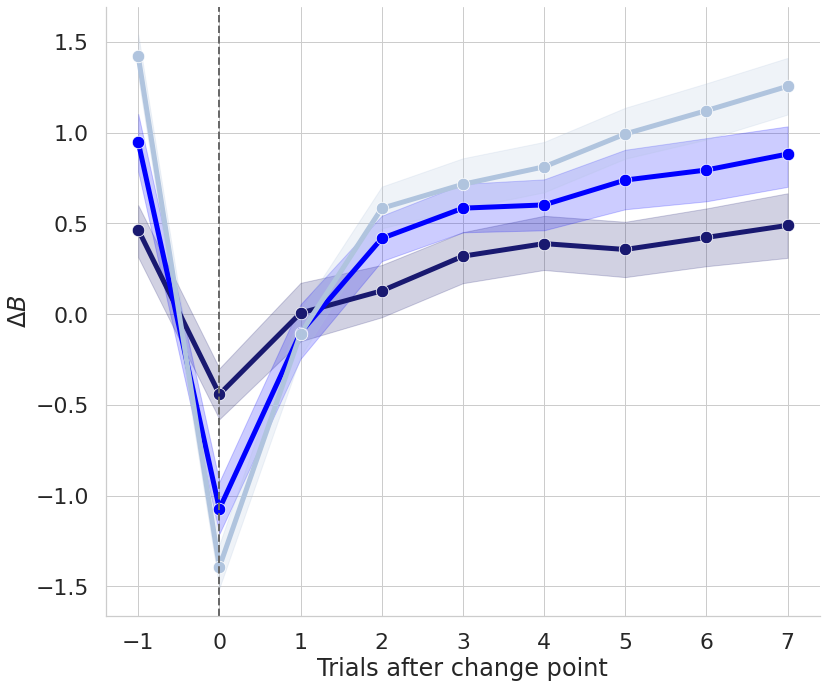

In [157]:
# dark blue to light blue
colors = ['midnightblue', 'blue', 'lightsteelblue']


sns.lineplot("shifted_epoch_trial", "ideal_B", color=dark_red, data=filtered_obs_ls_df,
            linewidth=5, alpha=1,marker='.',
             markersize=25, hue="p_optimal",  palette=sns.color_palette(colors), legend=False) 
plt.ylabel(r'$\Delta B$')  
plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')
plt.xlabel('Trials after change point')
sns.despine()

plt.savefig(os.path.join(fig_path, 'loki0.5_prob_B_ts.png'), dpi=600, 
                        bbox_inches='tight', transparent=0)

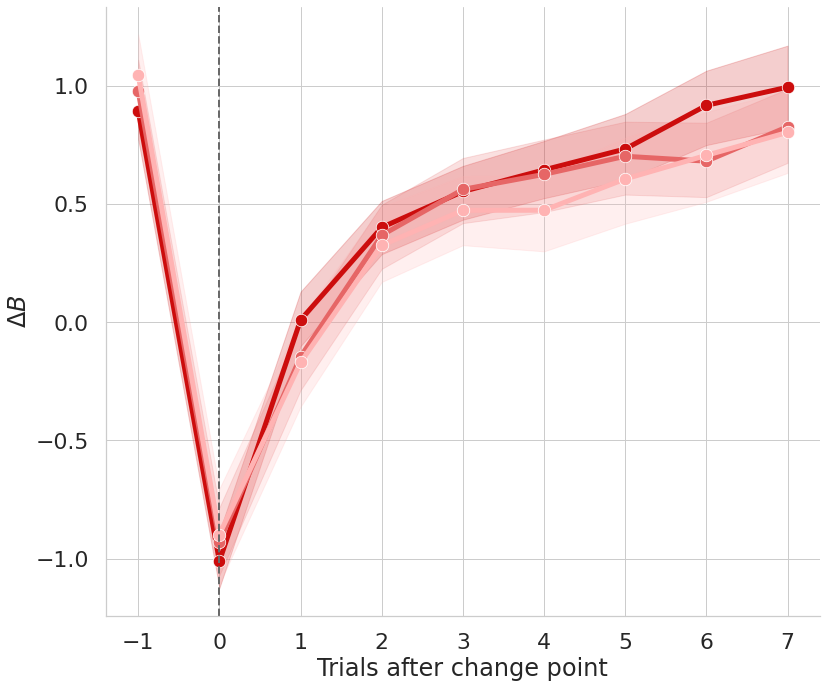

In [158]:
# dark red to light red

light_red = (1, 0.7, 0.7)
mod_red = (0.9, 0.4, 0.4)
dark_red = (0.8, 0.05, 0.05)

colors = [dark_red, mod_red, light_red]

sns.lineplot("shifted_epoch_trial", "ideal_B", color=dark_red, data=filtered_obs_ls_df,
            linewidth=5, alpha=1,marker='.', markersize=25, 
             hue="lambda_val", palette=sns.color_palette(colors), legend=False) 
plt.ylabel(r'$\Delta B$')  
plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')
plt.xlabel('Trials after change point')

sns.despine()

plt.savefig(os.path.join(fig_path, 'loki0.5_lambda_B_ts.png'), dpi=600, 
                        bbox_inches='tight', transparent=0)

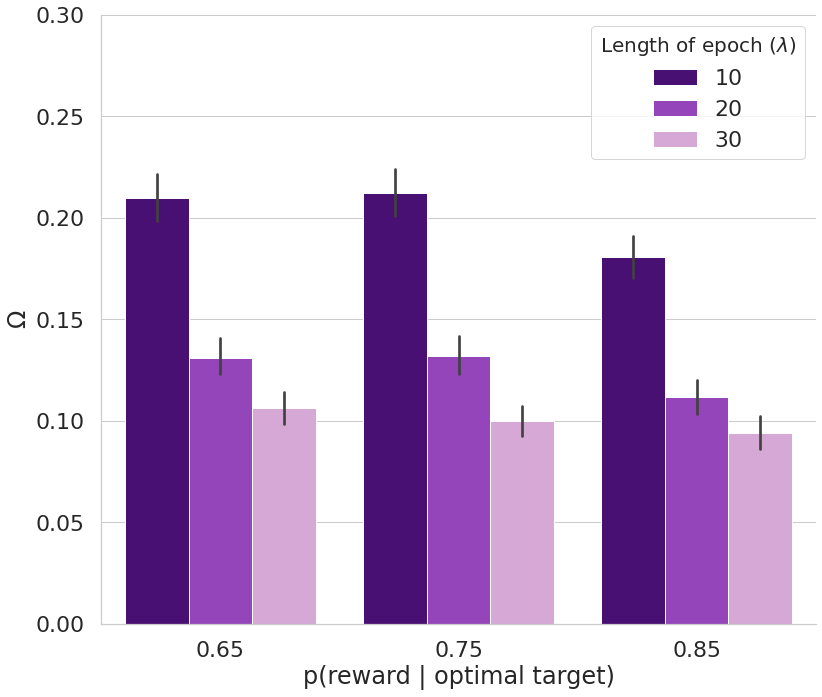

In [159]:
#create bar plot 
# Create an array with the colors you want to use
colors = ['indigo', 'darkorchid', 'plum']



ax = sns.barplot("p_optimal", "cpp", data=obs_ls_df,
            hue="lambda_val", palette=sns.color_palette(colors)) 
plt.ylabel(r'$\Omega$')  
# plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')
plt.xlabel('p(reward | optimal target)')

plt.legend(title='Length of epoch' + r' ($\lambda$)', loc='upper right', frameon=True)

plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.ylim(0, 0.3)

sns.despine()

plt.savefig(os.path.join(fig_path, 'loki0.5_conditional_cpp.png'), dpi=600, 
                        bbox_inches='tight', transparent=0)

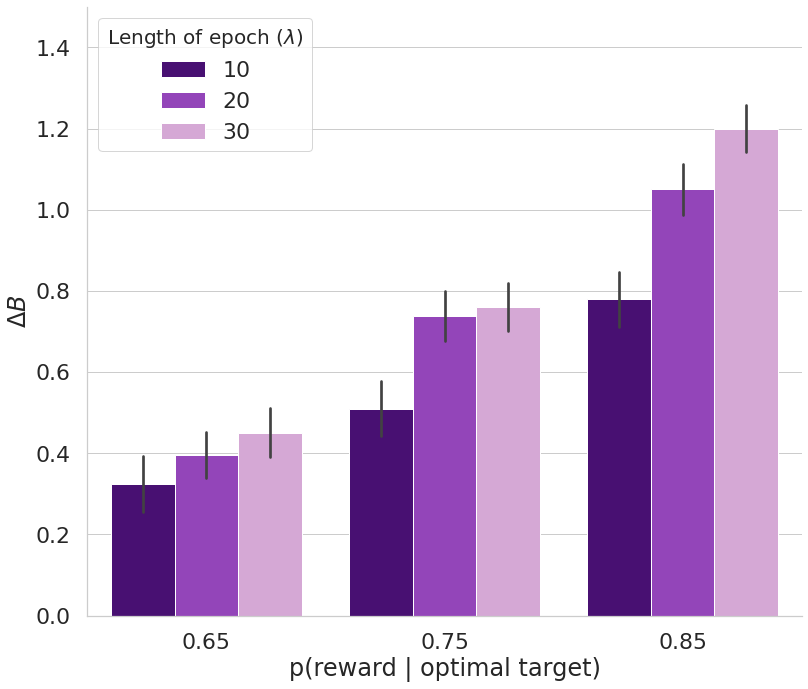

In [162]:
#create bar plot

colors = ['indigo', 'darkorchid', 'plum']

ax = sns.barplot("p_optimal", "ideal_B", data=obs_ls_df,
            hue="lambda_val", palette=sns.color_palette(colors)) 
plt.ylabel(r'$\Delta B$')  
# plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')
plt.xlabel('p(reward | optimal target)')

plt.legend(title='Length of epoch' + r' ($\lambda$)', loc='upper left', frameon=True)
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.ylim(0, 1.5)


sns.despine()

plt.savefig(os.path.join(fig_path, 'loki0.5_conditional_B.png'), dpi=600, 
                        bbox_inches='tight', transparent=0)